## <U><center>Bi-Variate Analysis

### <U><center>Numerical Vs Numerical:

In [6]:
###Loading Initial libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [7]:
LS=pd.read_csv('Lead Scoring.csv')
LS.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
print("Number of Rows in Dataset=",LS.shape[0],"and number of Columns in dataset=",LS.shape[1])

Number of Rows in Dataset= 9240 and number of Columns in dataset= 37


In [9]:
LS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [11]:
Cat=[]
Num=[]
for i in LS.columns:
    if LS[i].dtype=='float64' or LS[i].dtype=='int64':
        Num.append(i)
    else :
        Cat.append(i)
print("The Numerical features in the dataset are ",Num)
print('\n')
print("The categorical features in the dataset are ",Cat)

The Numerical features in the dataset are  ['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


The categorical features in the dataset are  ['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [12]:
LS.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [13]:
LS.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
LS['Lead Source'].replace({'google':'Google'},inplace=True)
LS = LS.replace('Select', np.nan)

In [15]:
LS['Lead Source']=LS['Lead Source'].fillna(LS['Lead Source'].mode()[0])
LS['TotalVisits']=LS['TotalVisits'].fillna(LS['TotalVisits'].median())
LS['Page Views Per Visit']=LS['Page Views Per Visit'].fillna(LS['Page Views Per Visit'].median())
LS['Last Activity']=LS['Last Activity'].fillna(LS['Last Activity'].mode()[0])
LS['Country']=LS['Country'].fillna(method='bfill')
LS['Specialization']=LS['Specialization'].fillna(method='bfill')
LS['How did you hear about X Education']=LS['How did you hear about X Education'].fillna(method='bfill')
LS['What is your current occupation']=LS['What is your current occupation'].fillna(method='bfill')
LS['What matters most to you in choosing a course']=LS['What matters most to you in choosing a course'].fillna(method='bfill')
LS['Tags']=LS['Tags'].fillna(method='bfill')
LS['Lead Quality'] = LS['Lead Quality'].replace(np.nan, 'Not Sure')
# We drop this column later 
LS['Lead Profile']=LS['Lead Profile'].fillna(method='bfill')
LS['City']=LS['City'].fillna(method='bfill')

In [16]:
LS.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Potential Lead,Mumbai,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [28]:
#Replacing the space in column names by '_' and converting to lower case
LS.columns = LS.columns.str.lower().str.strip().str.replace(' ','_')
LS.rename(columns = {'totalvisits':'total_visits'},inplace = True)
LS.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'total_visits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

#### 1.converted And total_visits

In [56]:
LS['total_visits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: total_visits, dtype: float64

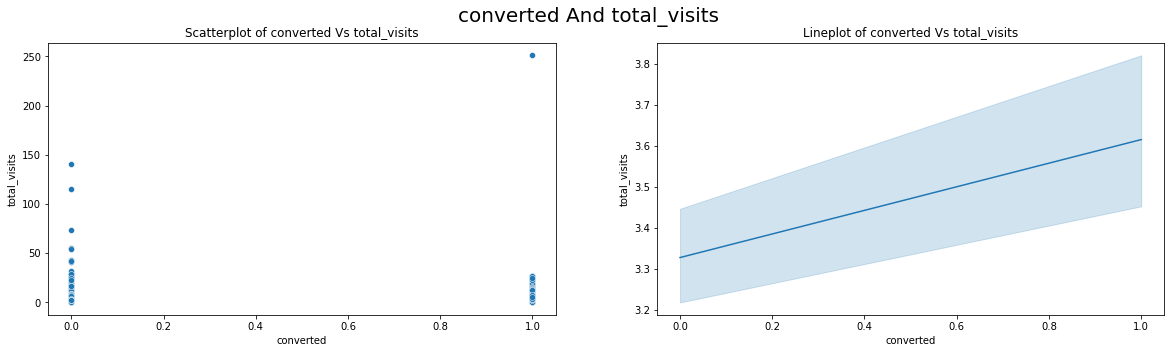

In [55]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x=LS['converted'],y=LS['total_visits'],ax=ax[0])
ax[0].set_title('Scatterplot of converted Vs total_visits')
sns.lineplot(x=LS['converted'],y=LS['total_visits'],ax=ax[1])
ax[1].set_title('Lineplot of converted Vs total_visits')
plt.suptitle('converted And total_visits',fontsize = 20)
plt.show()

Inferences:
- The total number of visits made by the customer on the website is in the range of 0 to 251.
- Many convereted leads have visited the sites anywhere in between 0-50 times and so does the lead not being convereted.
- Hence the probability of a lead being converted doesn't really depend on the total_visits of the customer to the website.

#### 2.converted And total_time_spent_on_website

In [58]:
LS['total_time_spent_on_website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: total_time_spent_on_website, dtype: float64

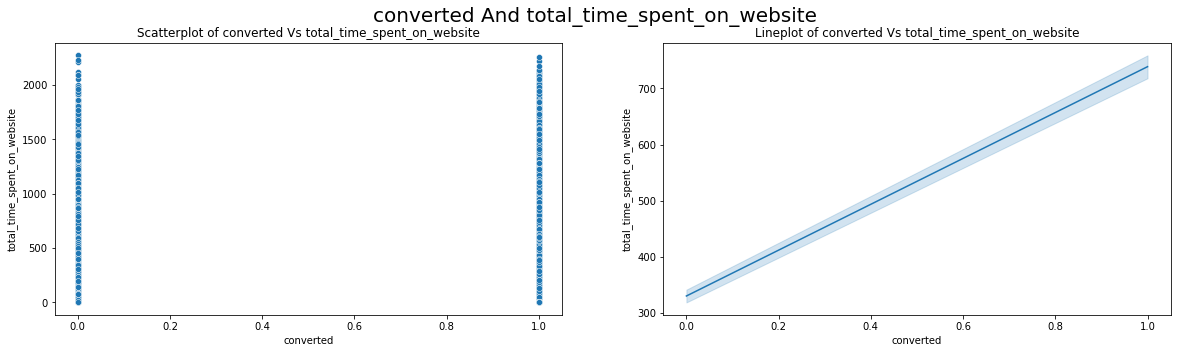

In [57]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x=LS['converted'],y=LS['total_time_spent_on_website'],ax=ax[0])
ax[0].set_title('Scatterplot of converted Vs total_time_spent_on_website')
sns.lineplot(x=LS['converted'],y=LS['total_time_spent_on_website'],ax=ax[1])
ax[1].set_title('Lineplot of converted Vs total_time_spent_on_website')
plt.suptitle('converted And total_time_spent_on_website',fontsize = 20)
plt.show()

Inferences:
- The total_time_spent_on_website of the customer on the X Education website is in the range of 0 to 2272.
- From the Lineplot we can say that the more the amount of time a person spends on the website,the probability of that person being converted to a customer is more.There exists a Linear Relationship we can say.

#### 3.converted And page_views_per_visit

In [60]:
LS['page_views_per_visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: page_views_per_visit, dtype: float64

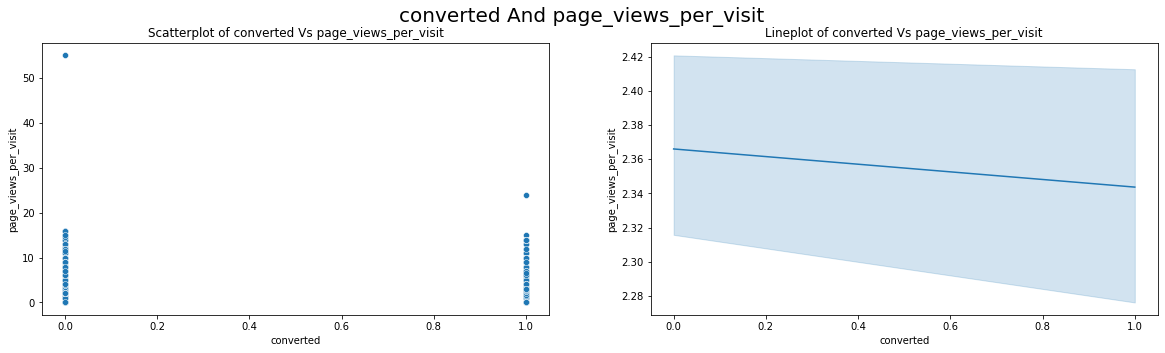

In [59]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x=LS['converted'],y=LS['page_views_per_visit'],ax=ax[0])
ax[0].set_title('Scatterplot of converted Vs page_views_per_visit')
sns.lineplot(x=LS['converted'],y=LS['page_views_per_visit'],ax=ax[1])
ax[1].set_title('Lineplot of converted Vs page_views_per_visit')
plt.suptitle('converted And page_views_per_visit',fontsize = 20)
plt.show()

Inferences:
- The page_views_per_visit of the customer on the X Education website is in the range of 0 to 55.
- From the scatterplot we can see that a person being converted is really no that dependant on the Average number of pages on the X Education website viewed during the visits.
- From the Lineplot we can infer that the probabilty of a lead being converted into a customer actually increases with small decrease of page_views_per_visit from its mean value.

#### 4.total_visits And total_time_spent_on_website

In [73]:
LS['total_visits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: total_visits, dtype: float64

In [74]:
LS['total_time_spent_on_website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: total_time_spent_on_website, dtype: float64

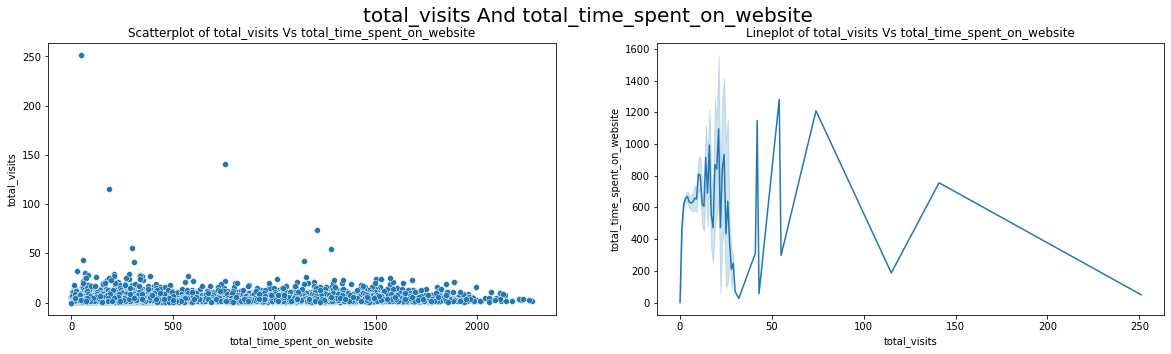

In [64]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x=LS['total_time_spent_on_website'],y=LS['total_visits'],ax=ax[0])
ax[0].set_title('Scatterplot of total_visits Vs total_time_spent_on_website')
sns.lineplot(x=LS['total_visits'],y=LS['total_time_spent_on_website'],ax=ax[1])
ax[1].set_title('Lineplot of total_visits Vs total_time_spent_on_website')
plt.suptitle('total_visits And total_time_spent_on_website',fontsize = 20)
plt.show()

Inferences:
- Not much inference can be drawn of these plots.Apart from the varying total_time_spent_on_website with total_visits

#### 5.total_visits And page_views_per_visit

In [77]:
LS['total_visits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: total_visits, dtype: float64

In [78]:
LS['page_views_per_visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: page_views_per_visit, dtype: float64

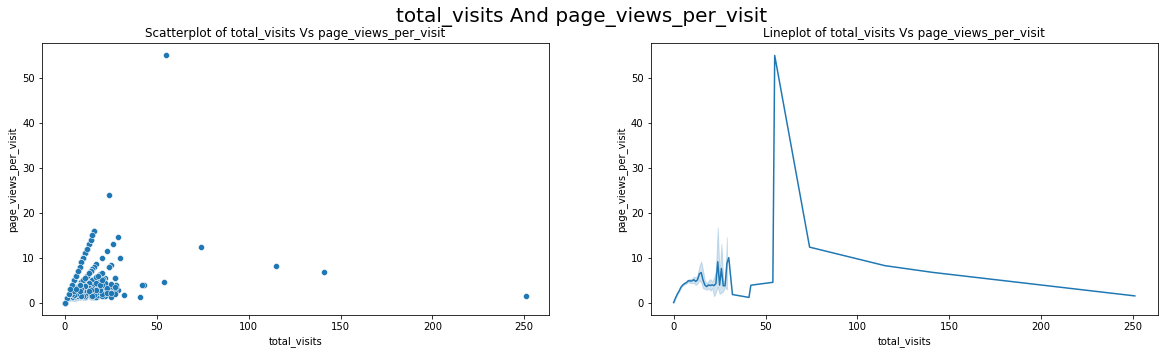

In [76]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x=LS['total_visits'],y=LS['page_views_per_visit'],ax=ax[0])
ax[0].set_title('Scatterplot of total_visits Vs page_views_per_visit')
sns.lineplot(x=LS['total_visits'],y=LS['page_views_per_visit'],ax=ax[1])
ax[1].set_title('Lineplot of total_visits Vs page_views_per_visit')
plt.suptitle('total_visits And page_views_per_visit',fontsize = 20)
plt.show()

Inferences:
- From the scatterplot we see that when the total number of visits made by the customer on the website lies between 0 to 25 the Average number of pages on the website viewed during the visits is anywhere in between 0 - 20
- Not much inference can be drawn from the Lineplot

#### 6.total_time_spent_on_website And page_views_per_visit

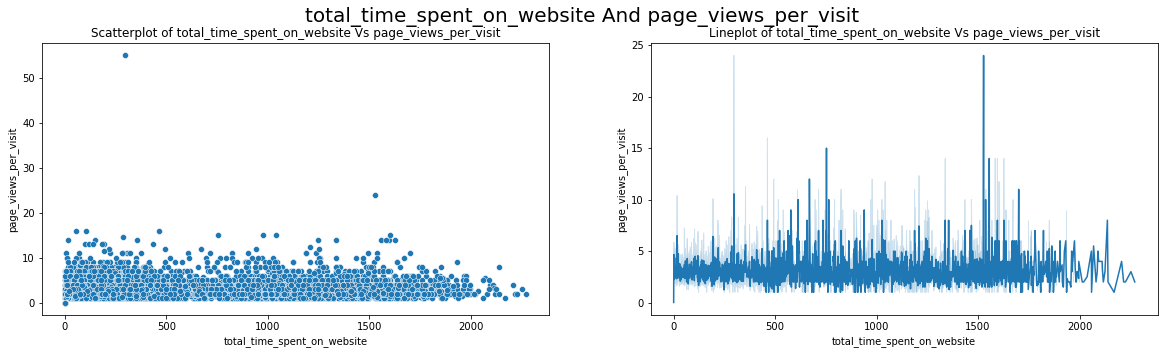

In [80]:
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.scatterplot(x=LS['total_time_spent_on_website'],y=LS['page_views_per_visit'],ax=ax[0])
ax[0].set_title('Scatterplot of total_time_spent_on_website Vs page_views_per_visit')
sns.lineplot(x=LS['total_time_spent_on_website'],y=LS['page_views_per_visit'],ax=ax[1])
ax[1].set_title('Lineplot of total_time_spent_on_website Vs page_views_per_visit')
plt.suptitle('total_time_spent_on_website And page_views_per_visit',fontsize = 20)
plt.show()

Inferences:
- Those customers who tend to spend anywhere in between 0 - 500 minutes on the website visit around 0 to 15 number of pages on the website.
- From the scatterplot we see that the average number of pages on the website viewed by the customer during the visits is not that relevant with the total time spent by the customer on the website.

### Key Take-Aways:

- From converted and total_visits plot : The probability of a lead being converted doesn't really depend on the total number of visits made by the customer on the website.
- From converted And total_time_spent_on_website : The more the amount of time a person spends on the website,the probability of that person being converted to a customer is more.
- From converted And page_views_per_visit : The probabilty of a lead being converted into a customer actually increases with small decrease of page_views_per_visit from its mean value.